In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
data = pd.read_csv("epl_1819.csv")

In [37]:
data.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

### Mengubah Tipe Data

In [39]:
data['attack_passes'] = data['attack_passes'].str.replace(',', '')

In [40]:
data['attack_passes']=data['attack_passes'].astype('int64')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [42]:
data['attack_passes_long'] = data['attack_passes_long'].str.replace(',', '')
data['attack_passes_back'] = data['attack_passes_back'].str.replace(',', '')
data['attack_passes_long']=data['attack_passes_long'].astype('float64')
data['attack_passes_back']=data['attack_passes_back'].astype('float64')

In [43]:
data['defence_clearances'] = data['defence_clearances'].str.replace(',', '')
data['defence_clearances']=data['defence_clearances'].astype('int64')

### Mengecek data duplikasi dan null

In [45]:
data.duplicated().any()

False

In [46]:
data.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

### Cek Outliers

In [49]:
len(data.columns)

44

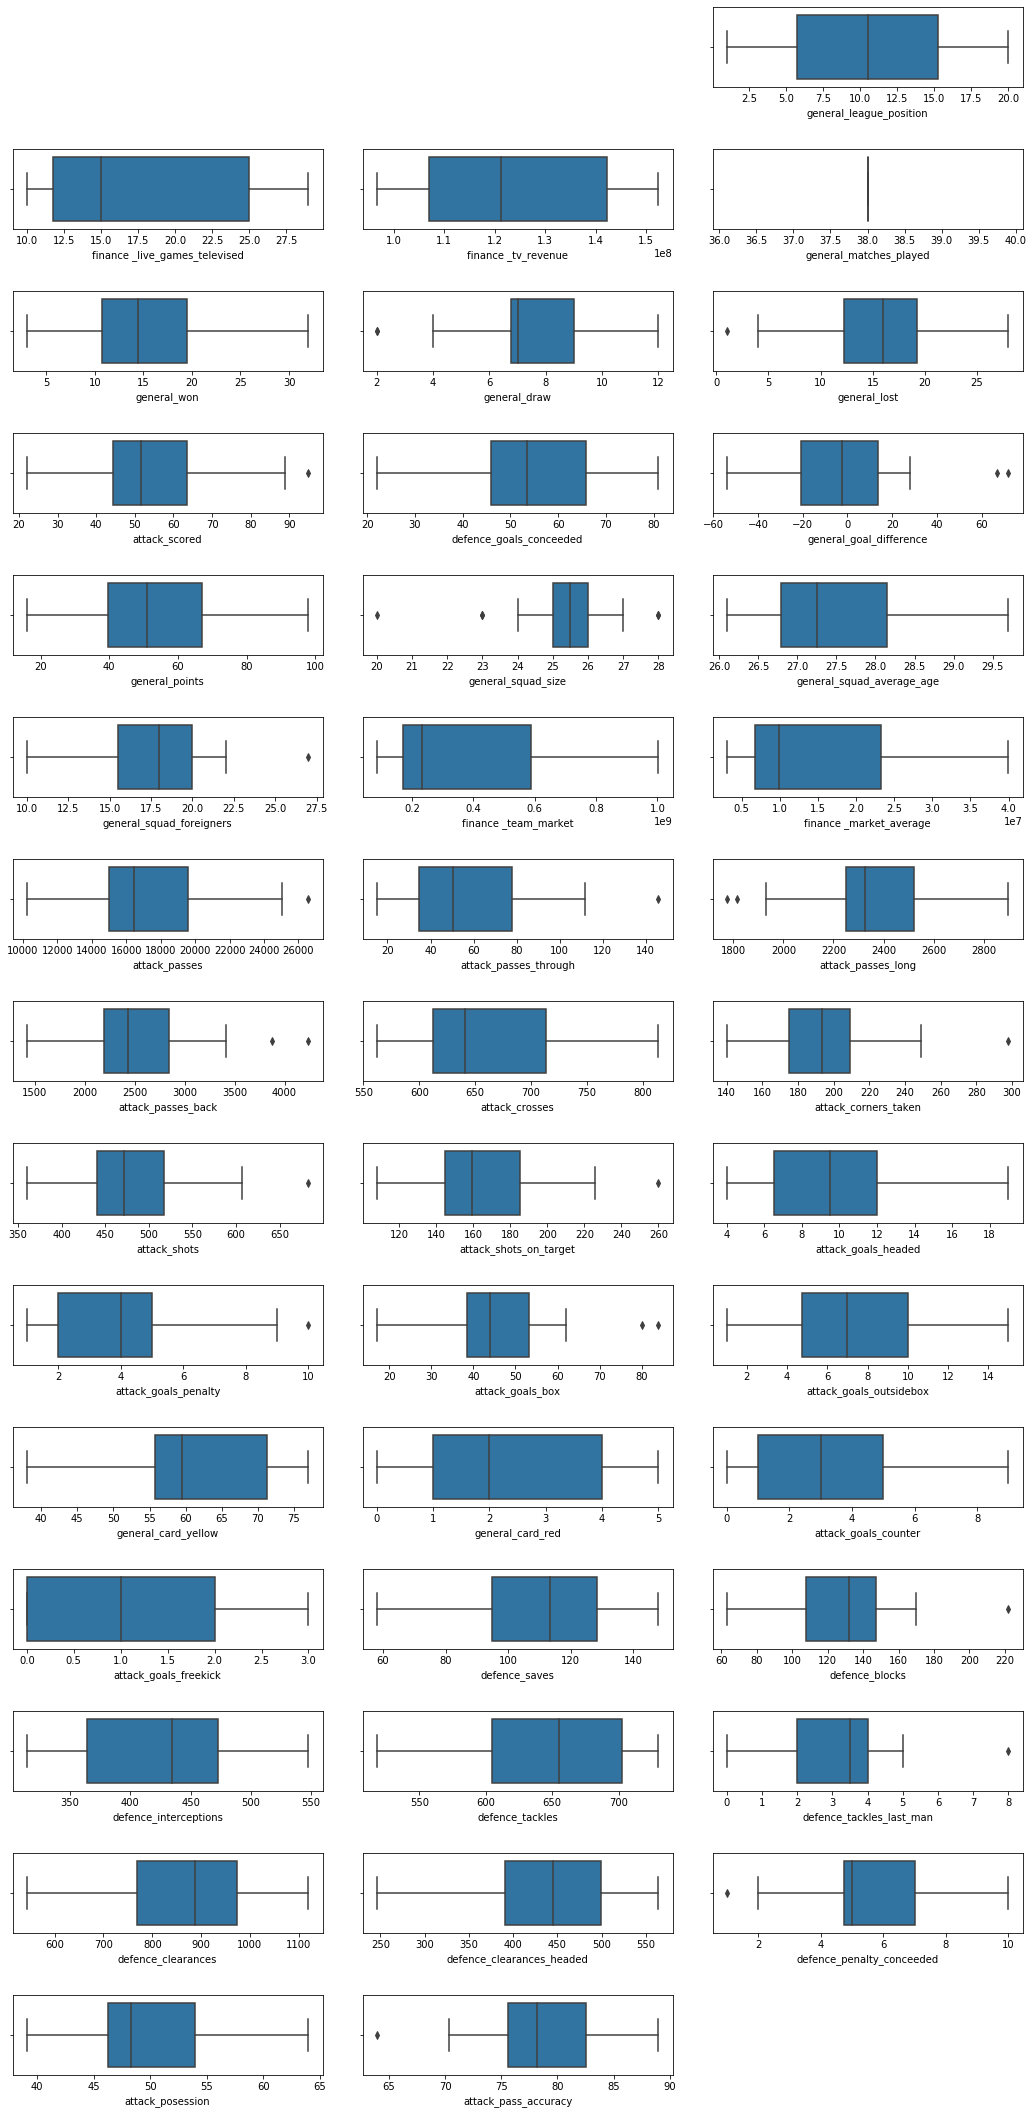

In [65]:
plt.figure(figsize=(15,30))
plt.subplots_adjust(top=0.8) 


for i, col in list(enumerate(data.columns)):
    if data[col].dtype !=object:        
        plt.subplot(15,3,i+1)
        sns.boxplot(data[col])
        
plt.tight_layout(pad=3.0)

Data outliers tampaknya bukan kesalahan input dan disebabkan karena performansi dari suatu club yang berbeda jauh dari club yang lain. Data tidak bersih karena meskipun outlier tidak mencerminkan kesalahan input, tidak terdapat missing values atau duplikat, namun ada beberapa data yang diinterpretasikan sebagai data bertipe object oleh python meskipun data tersebut sebenarnya bertipe numerik.

### Melihat club yang memiliki anomaly points

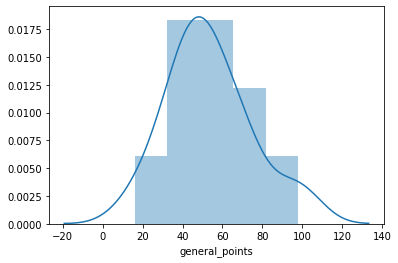

In [76]:
sns.distplot(data['general_points'])

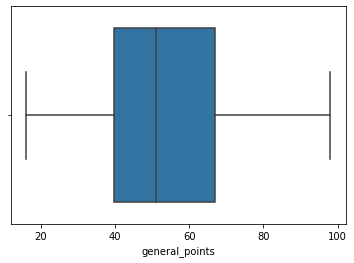

In [78]:
sns.boxplot(data['general_points'])

In [71]:
data[data['attack_scored']>90]

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0


### Which Team has the best attack?

In [75]:
pd.set_option("display.max_columns", 50)
data.nlargest(5, 'attack_scored')

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814.0,4240.0,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250.0,3416.0,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,20805,65,2062.0,3102.0,605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,21295,87,2267.0,3191.0,643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,54,11,66,26,27.3,21,550440000,22017600,19202,63,2242.0,2634.0,638,200,526,225,4,9,55,10,73,4,4,2,122,128,355,581,2,785,370,6,53.3,82.3


In [73]:
attack passes back, attack passes through, attack passes,  attack corners taken, attack_posession, attack_pass_accuracy
attack shots, attack shots on target,attack_goals_box, attack_goals_outsidebox, attack_goals_headed, attack passes long,
attack_goals_counter,attack_goals_freekick

(20, 44)

In [79]:
data['shot_accuracy'] = data['attack_shots_on_target']/data['attack_shots'] 

In [ ]:
#striker yang baik dapat melewati pemain lain dengan mudah sehingga hanya akan diperhatikan attack_passes_through

In [91]:
best_attack= data[['Team','general_league_position', 'attack_passes_through','attack_crosses', 'attack_corners_taken', 'shot_accuracy']]
best_attack

,Team,general_league_position,attack_passes_through,attack_crosses,attack_corners_taken,shot_accuracy
0,Manchester City,1,112,783,298,0.380673
1,Liverpool,2,98,721,249,0.393043
2,Chelsea,3,146,692,215,0.326194
3,Tottenham,4,87,643,194,0.351955
4,Arsenal,5,65,605,209,0.364026
5,Manchester United,6,63,638,200,0.427757
6,Wolverhampton,7,51,622,195,0.318658
7,Everton,8,44,814,215,0.339357
8,Leicester,9,88,779,210,0.357282
9,West Ham,10,75,630,188,0.356009


In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
best_attack[['attack_passes_through','attack_crosses','attack_corners_taken','shot_accuracy']] = scaler.fit_transform(best_attack[['attack_passes_through',
                                                                                                                                   'attack_crosses','attack_corners_taken','shot_accuracy']])

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [93]:
best_attack['Tot'] = best_attack['attack_passes_through']+best_attack['attack_crosses']+best_attack['attack_corners_taken']+best_attack['shot_accuracy']

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
best_attack.sort_values(by='Tot', ascending=False)

,Team,general_league_position,attack_passes_through,attack_crosses,attack_corners_taken,shot_accuracy,Tot
0,Manchester City,1,0.740458,0.876984,1.000000,0.655451,3.272893
1,Liverpool,2,0.633588,0.630952,0.689873,0.745973,2.700387
8,Leicester,9,0.557252,0.861111,0.443038,0.484271,2.345672
2,Chelsea,3,1.000000,0.515873,0.474684,0.256779,2.247336
7,Everton,8,0.221374,1.000000,0.474684,0.353105,2.049162
5,Manchester United,6,0.366412,0.301587,0.379747,1.000000,2.047746
3,Tottenham,4,0.549618,0.321429,0.341772,0.445295,1.658114
4,Arsenal,5,0.381679,0.170635,0.436709,0.533624,1.522647
9,West Ham,10,0.458015,0.269841,0.303797,0.474960,1.506614
13,Bournemouth,14,0.320611,0.202381,0.322785,0.544200,1.389976


In [96]:
data.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,shot_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814.0,4240.0,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,0.380673
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250.0,3416.0,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4,0.393043
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,25070,146,1774.0,3874.0,692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6,0.326194
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,21295,87,2267.0,3191.0,643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2,0.351955
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,20805,65,2062.0,3102.0,605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3,0.364026


In [120]:
defence = data[['Team', 'general_league_position','defence_clearances', 'defence_clearances_headed',
                'defence_blocks', 'defence_interceptions', 'defence_goals_conceeded','defence_tackles',
                'defence_tackles_last_man']]
defence.head()

,Team,general_league_position,defence_clearances,defence_clearances_headed,defence_blocks,defence_interceptions,defence_goals_conceeded,defence_tackles,defence_tackles_last_man
0,Manchester City,1,543,295,63,362,23,518,0
1,Liverpool,2,639,317,78,314,22,610,2
2,Chelsea,3,593,330,73,351,39,618,2
3,Tottenham,4,770,411,112,326,39,626,3
4,Arsenal,5,762,404,118,412,51,609,2


In [121]:
defence['total_tackles']=defence['defence_tackles']+defence['defence_tackles_last_man']
defence['total_clearances']= defence['defence_clearances']+defence['defence_clearances_headed']
defence.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team,general_league_position,defence_clearances,defence_clearances_headed,defence_blocks,defence_interceptions,defence_goals_conceeded,defence_tackles,defence_tackles_last_man,total_tackles,total_clearances
0,Manchester City,1,543,295,63,362,23,518,0,518,838
1,Liverpool,2,639,317,78,314,22,610,2,612,956
2,Chelsea,3,593,330,73,351,39,618,2,620,923
3,Tottenham,4,770,411,112,326,39,626,3,629,1181
4,Arsenal,5,762,404,118,412,51,609,2,611,1166


In [122]:
defence.drop(columns=['defence_tackles','defence_tackles_last_man', 'defence_clearances','defence_clearances_headed'], 
             axis=1, inplace=True)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [123]:
defence.head()

,Team,general_league_position,defence_blocks,defence_interceptions,defence_goals_conceeded,total_tackles,total_clearances
0,Manchester City,1,63,362,23,518,838
1,Liverpool,2,78,314,22,612,956
2,Chelsea,3,73,351,39,620,923
3,Tottenham,4,112,326,39,629,1181
4,Arsenal,5,118,412,51,611,1166


In [124]:
scaler2= MinMaxScaler()
defence[['defence_blocks','defence_interceptions','defence_goals_conceeded','total_tackles','total_clearances']] = scaler.fit_transform(defence[['defence_blocks','defence_interceptions','defence_goals_conceeded','total_tackles','total_clearances']])

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [125]:
defence.head()

,Team,general_league_position,defence_blocks,defence_interceptions,defence_goals_conceeded,total_tackles,total_clearances
0,Manchester City,1,0.000000,0.205128,0.016949,0.000000,0.000000
1,Liverpool,2,0.094340,0.000000,0.000000,0.439252,0.139480
2,Chelsea,3,0.062893,0.158120,0.288136,0.476636,0.100473
3,Tottenham,4,0.308176,0.051282,0.288136,0.518692,0.405437
4,Arsenal,5,0.345912,0.418803,0.491525,0.434579,0.387707


In [126]:
#pembobotan defence interceptions 2 kali dibandingkan yang lain
defence['defence_interceptions']= 2*defence['defence_interceptions']
#defence_goals_conceded menyatakan jumlah kebobolan goal dari defender, sehingga harus dibobotkan negatif
defence['defence_goals_conceeded']= -1*defence['defence_goals_conceeded']

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [127]:
defence.head()

,Team,general_league_position,defence_blocks,defence_interceptions,defence_goals_conceeded,total_tackles,total_clearances
0,Manchester City,1,0.000000,0.410256,-0.016949,0.000000,0.000000
1,Liverpool,2,0.094340,0.000000,-0.000000,0.439252,0.139480
2,Chelsea,3,0.062893,0.316239,-0.288136,0.476636,0.100473
3,Tottenham,4,0.308176,0.102564,-0.288136,0.518692,0.405437
4,Arsenal,5,0.345912,0.837607,-0.491525,0.434579,0.387707


In [128]:
defence['Total_score']= defence['defence_blocks']+defence['defence_interceptions']+defence['defence_goals_conceeded']+defence['total_tackles']+defence['total_clearances']

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
defence.sort_values(by='Total_score', ascending=False)

,Team,general_league_position,defence_blocks,defence_interceptions,defence_goals_conceeded,total_tackles,total_clearances,Total_score
12,Newcastle,13,0.446541,1.641026,-0.440678,0.934579,1.000000,3.581468
15,Southampton,16,0.566038,2.000000,-0.728814,0.864486,0.865248,3.566958
6,Wolverhampton,7,0.534591,1.598291,-0.406780,0.953271,0.531915,3.211288
17,Cardiff,18,0.528302,1.829060,-0.796610,0.658879,0.695035,2.914666
16,Brighton,17,0.672956,1.273504,-0.644068,0.780374,0.687943,2.770710
11,Crystal Palace,12,0.490566,1.128205,-0.525424,1.000000,0.672577,2.765924
9,West Ham,10,0.490566,1.222222,-0.559322,0.981308,0.489362,2.624136
19,Huddersfield,20,0.421384,1.846154,-0.915254,0.906542,0.078014,2.336839
7,Everton,8,0.138365,1.213675,-0.406780,0.869159,0.492908,2.307327
8,Leicester,9,0.207547,1.042735,-0.440678,0.757009,0.717494,2.284108


### 5.Which team is good in financial aspect?

In [130]:
data.columns

Index(['Team', 'category', 'general_league_position',
       'finance _live_games_televised', 'finance _tv_revenue',
       'general_matches_played', 'general_won', 'general_draw', 'general_lost',
       'attack_scored', 'defence_goals_conceeded', 'general_goal_difference',
       'general_points', 'general_squad_size', 'general_squad_average_age',
       'general_squad_foreigners', 'finance _team_market',
       'finance _market_average', 'attack_passes', 'attack_passes_through',
       'attack_passes_long', 'attack_passes_back', 'attack_crosses',
       'attack_corners_taken', 'attack_shots', 'attack_shots_on_target',
       'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box',
       'attack_goals_outsidebox', 'general_card_yellow', 'general_card_red',
       'attack_goals_counter', 'attack_goals_freekick', 'defence_saves',
       'defence_blocks', 'defence_interceptions', 'defence_tackles',
       'defence_tackles_last_man', 'defence_clearances',
       'defence_cleara

'finance _live_games_televised', 'finance _tv_revenue', 'general_won', 'finance _team_market', 'finance _market_average',
'general_squad_foreigners','general_squad_size'

In [131]:
data.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,shot_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814.0,4240.0,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0,0.380673
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250.0,3416.0,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4,0.393043
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,25070,146,1774.0,3874.0,692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6,0.326194
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,21295,87,2267.0,3191.0,643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2,0.351955
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,20805,65,2062.0,3102.0,605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3,0.364026


In [132]:
#count total win per million dollars
data['revenue']= (data['finance _tv_revenue']*data['finance _live_games_televised'])-(data['finance _market_average']*data['general_squad_size'])+data['finance _team_market']

In [137]:
data.sort_values(by='revenue', ascending=False)[['Team','general_league_position','revenue']]

,Team,general_league_position,revenue
1,Liverpool,2,4420417234
0,Manchester City,1,3929165230
5,Manchester United,6,3825829836
3,Tottenham,4,3776000826
2,Chelsea,3,3650693800
4,Arsenal,5,3554899900
7,Everton,8,2314782290
12,Newcastle,13,2282521942
9,West Ham,10,1960379408
6,Wolverhampton,7,1907494310
